# CAP4630 Assignment 1

In [0]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
from mpl_toolkits import mplot3d
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Plotting 

In [0]:
def f_min(x,y):
  return y**2 + x**2

In [0]:
x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)

x_grid, y_grid = np.meshgrid(x, y)
z_grid = f_min(x_grid, y_grid)

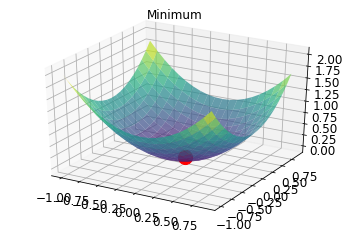

In [184]:
ax = plt.axes(projection='3d')
ax.scatter(xs = [0], ys = [0], zs = [0], s=200, color='red')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none', alpha=0.7)
ax.set_title('Minimum')
plt.show()

In [0]:
def f_saddle(x,y):
  return y**2 - x**2

In [0]:
x = np.arange(-1, 1, 0.1)
y = np.arange(-1, 1, 0.1)

x_grid, y_grid = np.meshgrid(x, y)
z_grid = f_saddle(x_grid, y_grid)

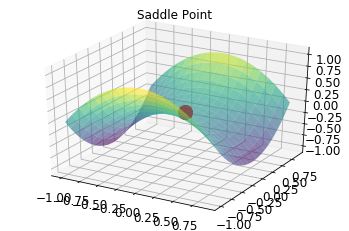

In [187]:
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs = [0], ys = [0], zs = [0], s=200, color='red')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none', alpha=0.6)
ax.set_title('Saddle Point')
plt.show()

In [0]:
def f_max(x,y):
  return (np.cos(y) + np.cos(x))

In [0]:
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)

x_grid, y_grid = np.meshgrid(x, y)
z_grid = f_max(x_grid, y_grid)

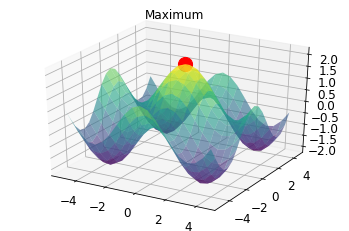

In [190]:
ax = plt.axes(projection='3d')
ax.scatter(xs = [0], ys = [0], zs = [2], s=200, color='red')
ax.plot_surface(x_grid, y_grid, z_grid, cmap='viridis', edgecolor='none', alpha=0.6)
ax.set_title('Maximum')
plt.show()

## Linear Regression

In [0]:
np.random.seed(42)

xs = 2 * np.random.rand(200, 1)

# Using 2 multipliers against x
ys = 4 + 7 * xs + 5 * xs + np.random.rand(200, 1)

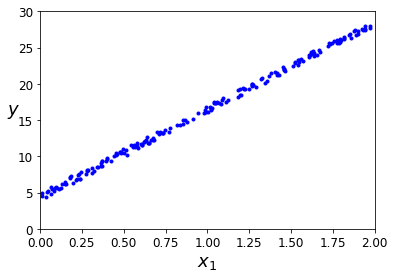

In [192]:
plt.plot(xs, ys, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 30])
plt.show()

In [0]:
# split the data into training and test sets
# train set
train_xs = xs[:160]
train_ys = ys[:160]
# test set
test_xs = xs[160:]
test_ys = ys[160:]


In [0]:
# number of epochs
epochs = 1000
# learning rate
lr = 0.01

In [0]:
# initial value for weights w_1, w_2 and bias b
w1 = np.random.randn(1)
w2 = np.random.randn(1)

b = np.zeros(1)

In [0]:
for epoch in range(epochs):
  for i in range(160):
    y_pred = w1 * train_xs[i] + w2 * train_xs[i] + b
    
    grad_w1 = (y_pred - train_ys[i]) * w1
    grad_w2 = (y_pred - train_ys[i]) * w2
    grad_b = (y_pred - train_ys[i])
    
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2
    b -= lr * grad_b

In [0]:
test_loss = 0
for i in np.arange(20):
  test_loss += 0.5 * (w1 * test_xs[i] + w2 * test_xs[i] + b - test_ys[i]) ** 2
test_loss /= 20

In [198]:
test_loss

array([0.05663588])

In [0]:
pred_ys = w1 * test_xs + b

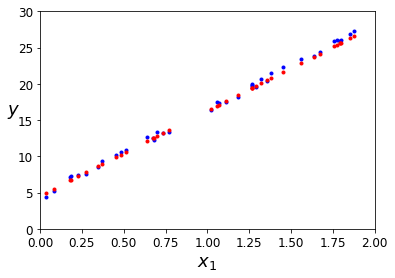

In [200]:
plt.plot(test_xs, test_ys, "b.")
plt.plot(test_xs, pred_ys, "r.") # predicted values
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 30])
plt.show()

In [201]:
b

array([4.57270797])

In [202]:
w1

array([11.733744])

In [203]:
w2

array([0.18878415])

## Average MNIST Digits

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [0]:
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

In [206]:
print(x.shape)
print(y.shape)

(70000, 28, 28)
(70000,)


In [0]:
nums = {i: [] for i in range(10)}

In [0]:
for i in range(len(y)):
  nums[y[i]].append(x[i])

In [0]:
for i in range(len(nums)):
  nums[i] = np.array(nums[i])

In [0]:
avg_nums = {i: np.mean(nums[i], axis=0) / 255 for i in range(len(nums))}

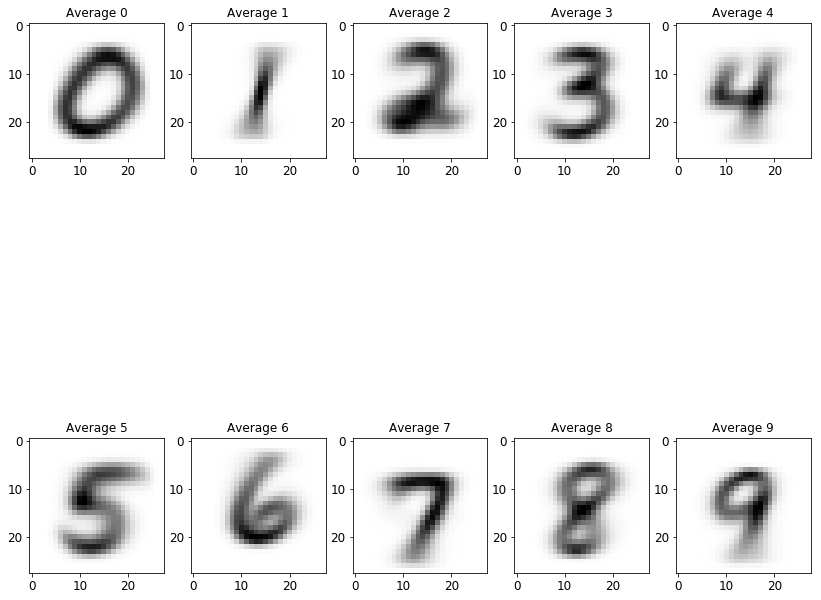

In [213]:
fig = plt.figure(10, (14,14))

for i in range(len(avg_nums)):
    ax = plt.subplot(2,5,i+1)
    ax.imshow(avg_nums[i], cmap='Greys')
    ax.set_title('Average {}'.format(i))